### First neural network in keras
We will use simple data of mobile price range classifier. The dataset consists of 20 features and we need to predict the price range in which phone lies. These ranges are divided into 4 classes.
<br>
Link to dataset - https://www.kaggle.com/iabhishekofficial/mobile-price-classification 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#dataset import
dataset = pd.read_csv('data/train.csv')
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
#Changing pandas dataframe to numpy array
X = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print('Normalized data:')
print(X[0])

#One hot encode
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print('One hot encoded array:')
print(y[0:5])

#Train test split of model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

Normalized data:
[-0.90259726 -0.9900495   0.83077942 -1.01918398 -0.76249466 -1.04396559
 -1.38064353  0.34073951  1.34924881 -1.10197128 -1.3057501  -1.40894856
 -1.14678403  0.39170341 -0.78498329  0.2831028   1.46249332 -1.78686097
 -1.00601811  0.98609664]
One hot encoded array:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\sanch\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
#To visualize neural network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_13 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1600/1600 [==============================] - 1s 600us/step - loss: 1.3835 - acc: 0.3019
Epoch 2/100
1600/1600 [==============================] - 0s 60us/step - loss: 1.3401 - acc: 0.3369
Epoch 3/100
1600/1600 [==============================] - 0s 72us/step - loss: 1.2986 - acc: 0.3756
Epoch 4/100
1600/1600 [==============================] - 0s 63us/step - loss: 1.2525 - acc: 0.4206
Epoch 5/100
1600/1600 [==============================] - 0s 62us/step - loss: 1.1982 - acc: 0.4675
Epoch 6/100
1600/1600 [==============================] - 0s 58us/step - loss: 1.1340 - acc: 0.5256
Epoch 7/100
1600/1600 [==============================] - 0s 72us/step - loss: 1.0614 - acc: 0.5700
Epoch 8/100
1600/1600 [==============================] - 0s 75us/step - loss: 0.9812 - acc: 0.6125
Epoch 9/100
1600/1600 [==============================] - 0s 47us/step - loss: 0.9019 - acc: 0.6269
Epoch 10/100
1600/1600 [==============================] - 0s 55us/step - loss: 0.8263 - acc: 0.6619
Epoch 11

1600/1600 [==============================] - 0s 45us/step - loss: 0.0535 - acc: 0.9888
Epoch 84/100
1600/1600 [==============================] - 0s 52us/step - loss: 0.0524 - acc: 0.9875
Epoch 85/100
1600/1600 [==============================] - 0s 53us/step - loss: 0.0507 - acc: 0.9919
Epoch 86/100
1600/1600 [==============================] - 0s 50us/step - loss: 0.0507 - acc: 0.9900
Epoch 87/100
1600/1600 [==============================] - 0s 42us/step - loss: 0.0487 - acc: 0.9913
Epoch 88/100
1600/1600 [==============================] - 0s 55us/step - loss: 0.0486 - acc: 0.9900
Epoch 89/100
1600/1600 [==============================] - 0s 63us/step - loss: 0.0471 - acc: 0.9913
Epoch 90/100
1600/1600 [==============================] - 0s 62us/step - loss: 0.0458 - acc: 0.9925
Epoch 91/100
1600/1600 [==============================] - 0s 55us/step - loss: 0.0456 - acc: 0.9937
Epoch 92/100
1600/1600 [==============================] - 0s 52us/step - loss: 0.0442 - acc: 0.9925
Epoch 93/100


In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [ ]:
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 90.5


In [ ]:
#Using test data as validation data.
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 1s 823us/step - loss: 1.4378 - acc: 0.2406 - val_loss: 1.4118 - val_acc: 0.2875
Epoch 2/100
1600/1600 [==============================] - 0s 67us/step - loss: 1.3852 - acc: 0.2825 - val_loss: 1.3713 - val_acc: 0.3175
Epoch 3/100
1600/1600 [==============================] - ETA: 0s - loss: 1.3474 - acc: 0.326 - 0s 50us/step - loss: 1.3459 - acc: 0.3231 - val_loss: 1.3349 - val_acc: 0.3650
Epoch 4/100
1600/1600 [==============================] - 0s 56us/step - loss: 1.3078 - acc: 0.3700 - val_loss: 1.2916 - val_acc: 0.4225
Epoch 5/100
1600/1600 [==============================] - 0s 74us/step - loss: 1.2600 - acc: 0.4094 - val_loss: 1.2381 - val_acc: 0.4575
Epoch 6/100
1600/1600 [==============================] - 0s 64us/step - loss: 1.2022 - acc: 0.4462 - val_loss: 1.1762 - val_acc: 0.4825
Epoch 7/100
1600/1600 [==============================] - 0s 48us/step - loss: 1.1381 - acc: 0.4856

Epoch 60/100
1600/1600 [==============================] - 0s 47us/step - loss: 0.1052 - acc: 0.9725 - val_loss: 0.1895 - val_acc: 0.9200
Epoch 61/100
1600/1600 [==============================] - 0s 38us/step - loss: 0.1037 - acc: 0.9738 - val_loss: 0.1883 - val_acc: 0.9225
Epoch 62/100
1600/1600 [==============================] - 0s 39us/step - loss: 0.1012 - acc: 0.9719 - val_loss: 0.1892 - val_acc: 0.9175
Epoch 63/100
1600/1600 [==============================] - 0s 38us/step - loss: 0.0991 - acc: 0.9750 - val_loss: 0.1875 - val_acc: 0.9250
Epoch 64/100
1600/1600 [==============================] - 0s 40us/step - loss: 0.0973 - acc: 0.9775 - val_loss: 0.1853 - val_acc: 0.9225
Epoch 65/100
1600/1600 [==============================] - 0s 43us/step - loss: 0.0962 - acc: 0.9750 - val_loss: 0.1874 - val_acc: 0.9200
Epoch 66/100
1600/1600 [==============================] - 0s 48us/step - loss: 0.0940 - acc: 0.9763 - val_loss: 0.1859 - val_acc: 0.9200
Epoch 67/100
1600/1600 [=================

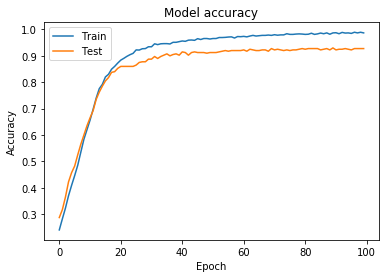

In [ ]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

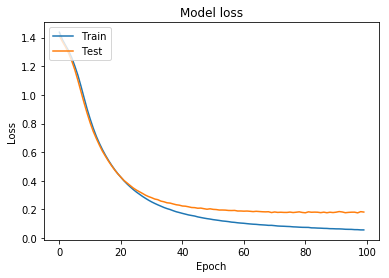

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()